# Missing data and aggregations
- in real world data, there will be missing data and or unwanted disturbance data

In [8]:
import numpy as np
import pandas as pd
np.random.seed (42)
n = 10
# create dunny data
random_matrix = np.random.randint(1, 10, (n, n)) # 2d array
index = np.random.choice(random_matrix.size, 10, replace = False)
print(index)
random_matrix = random_matrix*1.0
random_matrix.ravel()[index] = None
print(random_matrix)

[ 9 84  6 39 92 33 68 85 20 17]
[[ 7.  4.  8.  5.  7.  3. nan  8.  5. nan]
 [ 8.  8.  3.  6.  5.  2.  8. nan  2.  5.]
 [nan  6.  9.  1.  3.  7.  4.  9.  3.  5.]
 [ 3.  7.  5. nan  7.  2.  4.  9.  2. nan]
 [ 5.  2.  4.  7.  8.  3.  1.  4.  2.  8.]
 [ 4.  2.  6.  6.  4.  6.  2.  2.  4.  8.]
 [ 7.  9.  8.  5.  2.  5.  8.  9. nan  1.]
 [ 9.  7.  9.  8.  1.  8.  8.  3.  1.  8.]
 [ 3.  3.  1.  5. nan nan  7.  9.  8.  2.]
 [ 1.  7. nan  8.  5.  3.  8.  6.  3.  1.]]


In [10]:
scores = pd.DataFrame(random_matrix, 
                      index=[f"Player{i}" for i in range (1, n+1)],
                      columns = [f"Round {i}" for i in range (1,n+1)]
                      )
scores.head()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0


In [11]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player1 to Player10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Round 1   9 non-null      float64
 1   Round 2   10 non-null     float64
 2   Round 3   9 non-null      float64
 3   Round 4   9 non-null      float64
 4   Round 5   9 non-null      float64
 5   Round 6   9 non-null      float64
 6   Round 7   9 non-null      float64
 7   Round 8   9 non-null      float64
 8   Round 9   9 non-null      float64
 9   Round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


# missing
- isnull - returns True if null
- notnull - return null if not null
- dropna _ fills the null values with cretain value

In [12]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [14]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player1,False,False,False,False,False,False,True,False,False,True
Player2,False,False,False,False,False,False,False,True,False,False
Player3,True,False,False,False,False,False,False,False,False,False
Player4,False,False,False,True,False,False,False,False,False,True
Player5,False,False,False,False,False,False,False,False,False,False
Player6,False,False,False,False,False,False,False,False,False,False
Player7,False,False,False,False,False,False,False,False,True,False
Player8,False,False,False,False,False,False,False,False,False,False
Player9,False,False,False,False,True,True,False,False,False,False
Player10,False,False,True,False,False,False,False,False,False,False


In [15]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player1,True,True,True,True,True,True,False,True,True,False
Player2,True,True,True,True,True,True,True,False,True,True
Player3,False,True,True,True,True,True,True,True,True,True
Player4,True,True,True,False,True,True,True,True,True,False
Player5,True,True,True,True,True,True,True,True,True,True
Player6,True,True,True,True,True,True,True,True,True,True
Player7,True,True,True,True,True,True,True,True,False,True
Player8,True,True,True,True,True,True,True,True,True,True
Player9,True,True,True,True,False,False,True,True,True,True
Player10,True,True,False,True,True,True,True,True,True,True


In [16]:
scores.dropna(axis = 1)

,Round 2
Player1,4.0
Player2,8.0
Player3,6.0
Player4,7.0
Player5,2.0
Player6,2.0
Player7,9.0
Player8,7.0
Player9,3.0
Player10,7.0


In [18]:
# how to treat NaNs?
# depends on the situations
# many times need to talk to domain experts

scores.fillna(0) # may be resonable to give 0 for missing value

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## missing value strategy
Strategy depends on:
- dataset size
- valuable information(some rows, some columns)
- percentage missing values
- domain knowledge
missing values can impact
  - data visualization
  - arithmetic computations
  - summary statistics
  - machine learning algorithms

In [19]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

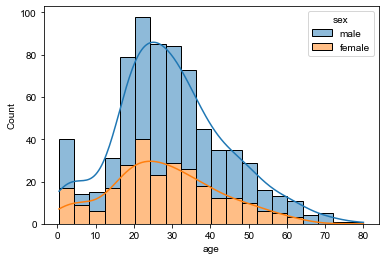

In [24]:
#focus on Age
sns.histplot(data = titanic, x= "age", kde = True, hue = "sex", multiple = "stack")
sns.set_theme()

In [25]:
#talked to a titanic historian
#this code says : use median age of corresponding gender to add ages
print(f"Number of males {np.sum(titanic['sex'] == 'male')}")
print(f"Number of females {np.sum(titanic['sex'] == 'female')}")
median_male_age = titanic.loc[titanic["sex"] =="male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] =="female", "age"].median()
median_female_age, median_male_age

Number of males 577
Number of females 314


(27.0, 29.0)

In [27]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] =="male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"] == 29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [28]:
titanic.isnull().sum()["age"]

53

In [31]:
titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"] == 27, "sex"].value_counts()

male      12
female     6
Name: sex, dtype: int64

In [33]:
titanic.isnull().sum()["sex"]

0

In [ ]:
sns.histplot(data = titanic, x= "age", kde = "a"):::

In [34]:
#groupby
titanic.groupby("sex").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.355581,0.429809,0.235702,25.523893,0.930676,0.712305


In [35]:
titanic.groupby("sex").median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,1.0,2.0,27.0,0.0,0.0,23.0,0.0,0.0
male,0.0,3.0,29.0,0.0,0.0,10.5,1.0,1.0


In [37]:
titanic.groupby("sex").max()

C:\Users\AMALDE~1\AppData\Local\Temp/ipykernel_9300/3636409492.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  titanic.groupby("sex").max()


,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


In [39]:
titanic.groupby("sex").mean()[["survived", "age"]]

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.355581
